In [1]:
import warnings
import tensorflow
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as mso
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\Python\Data Set\Creditcard\creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

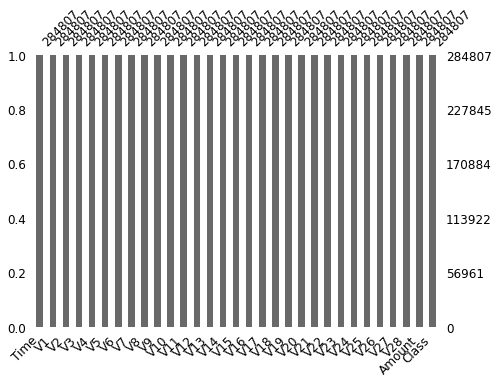

In [5]:
plt.figure(figsize = (16, 5))
ax_train = plt.subplot(1,2,2)
mso.bar(df, ax = ax_train, fontsize = 12);

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


0    284315
1       492
Name: Class, dtype: int64


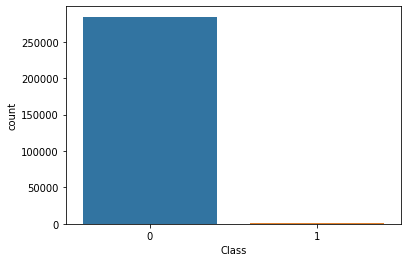

In [7]:
sns.countplot(df.Class)
print(df.Class.value_counts())

In [3]:

fraud = df[df.Class == 1]
non_fraud = df[df.Class == 0]
non_fraud_balanced = non_fraud.sample(600)
df = fraud.append(non_fraud_balanced, ignore_index = True)

0    600
1    492
Name: Class, dtype: int64


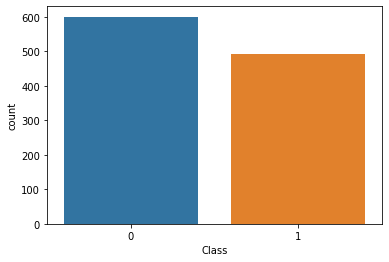

In [4]:
sns.countplot(df.Class)
print(df.Class.value_counts())

In [16]:
from sklearn import metrics
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers,regularizers

### Model With Two Hiddeen Layers

In [41]:
def training_neural_network_1(iterations,lr,Lambda):
    #Splittting the Data
    x = df.iloc[:, 1:30]
    y = df.iloc[:, -1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 112)

    #Standardization
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    #hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 56
    output_nodes = 1
    
    #Model Building
    model = Sequential()
    model.add(Dense(hidden_nodes, input_dim = 29, activation = "relu", kernel_initializer = "he_uniform"))
    model.add(Dropout(0.5))
    model.add(Dense(hidden_nodes/2, activation = "relu"))
    model.add(Dense(output_nodes, activation = "sigmoid", kernel_regularizer = regularizers.l2(Lambda)))
    sgd = optimizers.SGD(lr = learning_rate, decay = 1e-6, momentum = 0.9)
    model.compile(loss = "binary_crossentropy", optimizer = sgd, metrics = ['accuracy'])
    model.fit(x_train, y_train, epochs = iterations, batch_size = 100, validation_split = 0.3)
    score,loss = model.evaluate(x_train, y_train)
    print(model.summary())

    
    # Predicting the Test set results
    y_pred = model.predict(x_test)
    y_pred = (y_pred > 0.5)

    print('*'*20)
    score, acc = model.evaluate(x_test, y_test, batch_size = 10)
    print('Test score:', score)
    print('Test accuracy:', acc)

    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(pd.DataFrame(cm), annot = True, cmap = "YlGnBu" ,fmt = 'g')
    plt.title('Confusion matrix', y = 1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    #import classification_report
    from sklearn.metrics import classification_report
    print(classification_report(y_test,y_pred))

    #Roc_Curve
    from sklearn.metrics import roc_curve
    y_pred_proba = model.predict(x_test)
    fpr, tpr,_ = roc_curve(y_test, y_pred_proba)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr, label = 'ANN')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve')
    plt.show()

    #Area under ROC curve
    from sklearn.metrics import roc_auc_score
    roc_auc_score(y_test,y_pred_proba)

    return score,loss

Epoch 1/60
7/7 [==============================] - 2s 69ms/step - loss: 0.6409 - accuracy: 0.7152 - val_loss: 0.3815 - val_accuracy: 0.8893
Epoch 2/60
7/7 [==============================] - 0s 9ms/step - loss: 0.2826 - accuracy: 0.9165 - val_loss: 0.3509 - val_accuracy: 0.9008
Epoch 3/60
7/7 [==============================] - 0s 17ms/step - loss: 0.2126 - accuracy: 0.9394 - val_loss: 0.2980 - val_accuracy: 0.9198
Epoch 4/60
7/7 [==============================] - 0s 20ms/step - loss: 0.3400 - accuracy: 0.9100 - val_loss: 0.2819 - val_accuracy: 0.9122
Epoch 5/60
7/7 [==============================] - 0s 19ms/step - loss: 0.2080 - accuracy: 0.9345 - val_loss: 0.2561 - val_accuracy: 0.9160
Epoch 6/60
7/7 [==============================] - 0s 19ms/step - loss: 0.2115 - accuracy: 0.9329 - val_loss: 0.2460 - val_accuracy: 0.9198
Epoch 7/60
7/7 [==============================] - 0s 18ms/step - loss: 0.1812 - accuracy: 0.9476 - val_loss: 0.2427 - val_accuracy: 0.9313
Epoch 8/60
7/7 [============

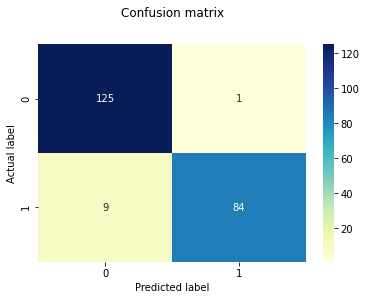

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       126
           1       0.99      0.90      0.94        93

    accuracy                           0.95       219
   macro avg       0.96      0.95      0.95       219
weighted avg       0.96      0.95      0.95       219



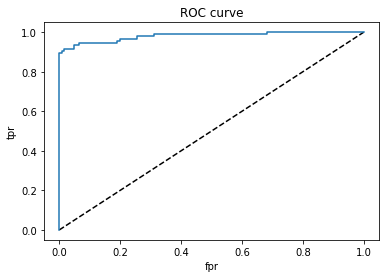

(0.16362683475017548, 0.9667811989784241)

In [42]:
training_neural_network_1(60,0.1,0.01)

### Model With Three Hiddeen Layers

In [30]:
def training_neural_network_2(iterations,lr,Lambda):
    #Splittting the Data
    x = df.iloc[:, 1:30]
    y = df.iloc[:, -1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 112)

    #Standardization
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    #hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 56
    output_nodes = 1

    #Metrices Dtaframe
    col_names = ["Accuracy", "Precision", "Recall", "F1_score", "Auc"]
    results_test = pd.DataFrame(columns = col_names)
    
    #Model Building
    model = Sequential()
    model.add(Dense(hidden_nodes, input_dim = 29, activation = "relu", kernel_initializer = "he_uniform"))
    model.add(Dense(hidden_nodes/2, activation = "relu"))
    model.add(Dropout(0.2))
    model.add(Dense(hidden_nodes/4, activation = "relu"))
    model.add(Dropout(0.2))
    model.add(Dense(output_nodes, activation = "sigmoid", kernel_regularizer = regularizers.l2(Lambda)))
    sgd = optimizers.SGD(lr = learning_rate, decay = 1e-6, momentum = 0.9)
    model.compile(loss = "binary_crossentropy", optimizer = sgd, metrics = ['accuracy'])
    model.fit(x_train, y_train, epochs = iterations, batch_size = 100, validation_split = 0.3)
    score,loss = model.evaluate(x_train, y_train)
    print(model.summary())

    
    # Predicting the Test set results
    y_pred = model.predict(x_test)
    y_pred = (y_pred > 0.5)

    print('*'*20)
    score, acc = model.evaluate(x_test, y_test, batch_size = 10)
    print('Test score:', score)
    print('Test accuracy:', acc)

    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(pd.DataFrame(cm), annot = True, cmap = "YlGnBu" ,fmt = 'g')
    plt.title('Confusion matrix', y = 1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    #import classification_report
    from sklearn.metrics import classification_report
    print(classification_report(y_test,y_pred))

    #Roc_Curve
    from sklearn.metrics import roc_curve
    y_pred_proba = model.predict(x_test)
    fpr, tpr,_ = roc_curve(y_test, y_pred_proba)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr, label = 'ANN')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve')
    plt.show()

    #Area under ROC curve
    from sklearn.metrics import roc_auc_score
    roc_auc_score(y_test,y_pred_proba)

    return score,loss

Epoch 1/80
7/7 [==============================] - 1s 62ms/step - loss: 0.5510 - accuracy: 0.7921 - val_loss: 0.3448 - val_accuracy: 0.8855
Epoch 2/80
7/7 [==============================] - 0s 10ms/step - loss: 0.3083 - accuracy: 0.9116 - val_loss: 0.2712 - val_accuracy: 0.9084
Epoch 3/80
7/7 [==============================] - 0s 13ms/step - loss: 0.3442 - accuracy: 0.9345 - val_loss: 0.2633 - val_accuracy: 0.9046
Epoch 4/80
7/7 [==============================] - 0s 18ms/step - loss: 0.2268 - accuracy: 0.9362 - val_loss: 0.2455 - val_accuracy: 0.9008
Epoch 5/80
7/7 [==============================] - 0s 17ms/step - loss: 0.2364 - accuracy: 0.9411 - val_loss: 0.2227 - val_accuracy: 0.9160
Epoch 6/80
7/7 [==============================] - 0s 19ms/step - loss: 0.2215 - accuracy: 0.9509 - val_loss: 0.2127 - val_accuracy: 0.9198
Epoch 7/80
7/7 [==============================] - 0s 20ms/step - loss: 0.1778 - accuracy: 0.9574 - val_loss: 0.2992 - val_accuracy: 0.9198
Epoch 8/80
7/7 [===========

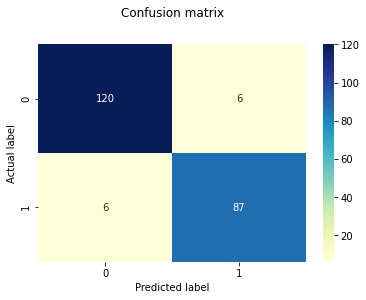

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       126
           1       0.94      0.94      0.94        93

    accuracy                           0.95       219
   macro avg       0.94      0.94      0.94       219
weighted avg       0.95      0.95      0.95       219



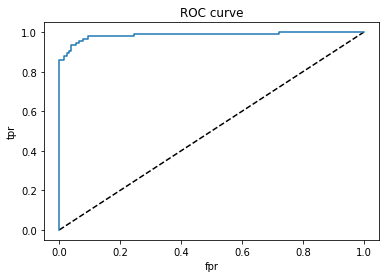

(0.23076286911964417, 0.9770904779434204)

In [31]:
training_neural_network_2(80,0.1,0.01)

###  Model With Four Hiddeen Layers

In [38]:
def training_neural_network_3(iterations,lr,Lambda):
    #Splittting the Data
    x = df.iloc[:, 1:30]
    y = df.iloc[:, -1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 112)

    #Standardization
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    #hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 56
    output_nodes = 1

    #Metrices Dtaframe
    col_names = ["Accuracy", "Precision", "Recall", "F1_score", "Auc"]
    results_test = pd.DataFrame(columns = col_names)
    
    #Model Building
    model = Sequential()
    model.add(Dense(hidden_nodes, input_dim = 29, activation = "relu", kernel_initializer = "he_uniform"))
    model.add(Dense(hidden_nodes/2, activation = "relu"))
    model.add(Dropout(0.4))
    model.add(Dense(hidden_nodes/4, activation = "relu"))
    model.add(Dropout(0.2))
    model.add(Dense(hidden_nodes/6, activation = "relu"))
    model.add(Dropout(0.2))
    model.add(Dense(output_nodes, activation = "sigmoid", kernel_regularizer = regularizers.l2(Lambda)))
    sgd = optimizers.SGD(lr = learning_rate, decay = 1e-6, momentum = 0.9)
    model.compile(loss = "binary_crossentropy", optimizer = sgd, metrics = ['accuracy'])
    model.fit(x_train, y_train, epochs = iterations, batch_size = 100, validation_split = 0.3)
    score,loss = model.evaluate(x_train, y_train)
    print(model.summary())

    
    # Predicting the Test set results
    y_pred = model.predict(x_test)
    y_pred = (y_pred > 0.5)

    print('*'*20)
    score, acc = model.evaluate(x_test, y_test, batch_size = 10)
    print('Test score:', score)
    print('Test accuracy:', acc)

    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(pd.DataFrame(cm), annot = True, cmap = "YlGnBu" ,fmt = 'g')
    plt.title('Confusion matrix', y = 1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    #import classification_report
    from sklearn.metrics import classification_report
    print(classification_report(y_test,y_pred))

    #Roc_Curve
    from sklearn.metrics import roc_curve
    y_pred_proba = model.predict(x_test)
    fpr, tpr,_ = roc_curve(y_test, y_pred_proba)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr, label = 'ANN')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve')
    plt.show()

    #Area under ROC curve
    from sklearn.metrics import roc_auc_score
    roc_auc_score(y_test,y_pred_proba)

    return score,loss

Epoch 1/100
7/7 [==============================] - 2s 77ms/step - loss: 0.7511 - accuracy: 0.4730 - val_loss: 0.6959 - val_accuracy: 0.6412
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6984 - accuracy: 0.6039 - val_loss: 0.6501 - val_accuracy: 0.7710
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6721 - accuracy: 0.6678 - val_loss: 0.5990 - val_accuracy: 0.8435
Epoch 4/100
7/7 [==============================] - 0s 15ms/step - loss: 0.5974 - accuracy: 0.7545 - val_loss: 0.5202 - val_accuracy: 0.8435
Epoch 5/100
7/7 [==============================] - 0s 15ms/step - loss: 0.5618 - accuracy: 0.7823 - val_loss: 0.4493 - val_accuracy: 0.8702
Epoch 6/100
7/7 [==============================] - 0s 15ms/step - loss: 0.5010 - accuracy: 0.8085 - val_loss: 0.4001 - val_accuracy: 0.8779
Epoch 7/100
7/7 [==============================] - 0s 16ms/step - loss: 0.4915 - accuracy: 0.8298 - val_loss: 0.3676 - val_accuracy: 0.8817
Epoch 8/100
7/7 [===

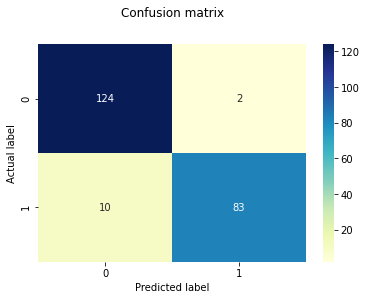

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       126
           1       0.98      0.89      0.93        93

    accuracy                           0.95       219
   macro avg       0.95      0.94      0.94       219
weighted avg       0.95      0.95      0.94       219



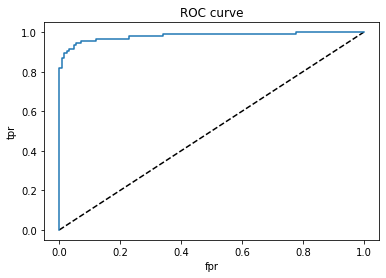

(0.1814863234758377, 0.9599083662033081)

In [39]:
training_neural_network_3(100,0.01,0.01)

###  Model With Five Hiddeen Layers

In [47]:
def training_neural_network_4(iterations,lr,Lambda):
    #Splittting the Data
    x = df.iloc[:, 1:30]
    y = df.iloc[:, -1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 112)

    #Standardization
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    #hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 56
    output_nodes = 1

    #Metrices Dtaframe
    col_names = ["Accuracy", "Precision", "Recall", "F1_score", "Auc"]
    results_test = pd.DataFrame(columns = col_names)
    
    #Model Building
    model = Sequential()
    model.add(Dense(hidden_nodes, input_dim = 29, activation = "relu", kernel_initializer = "he_uniform"))
    model.add(Dense(hidden_nodes/2, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(hidden_nodes/4, activation = "relu"))
    model.add(Dropout(0.4))
    model.add(Dense(hidden_nodes/6, activation = "relu"))
    model.add(Dropout(0.2))
    model.add(Dense(hidden_nodes/6, activation = "relu"))
    model.add(Dropout(0.2))
    model.add(Dense(output_nodes, activation = "sigmoid", kernel_regularizer = regularizers.l2(Lambda)))
    sgd = optimizers.SGD(lr = learning_rate, decay = 1e-6, momentum = 0.9)
    model.compile(loss = "binary_crossentropy", optimizer = sgd, metrics = ['accuracy'])
    model.fit(x_train, y_train, epochs = iterations, batch_size = 100, validation_split = 0.3)
    score,loss = model.evaluate(x_train, y_train)
    print(model.summary())

    
    # Predicting the Test set results
    y_pred = model.predict(x_test)
    y_pred = (y_pred > 0.5)

    print('*'*20)
    score, acc = model.evaluate(x_test, y_test, batch_size = 10)
    print('Test score:', score)
    print('Test accuracy:', acc)

    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(pd.DataFrame(cm), annot = True, cmap = "YlGnBu" ,fmt = 'g')
    plt.title('Confusion matrix', y = 1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    #import classification_report
    from sklearn.metrics import classification_report
    print(classification_report(y_test,y_pred))

    #Roc_Curve
    from sklearn.metrics import roc_curve
    y_pred_proba = model.predict(x_test)
    fpr, tpr,_ = roc_curve(y_test, y_pred_proba)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr, label = 'ANN')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve')
    plt.show()

    #Area under ROC curve
    from sklearn.metrics import roc_auc_score
    roc_auc_score(y_test,y_pred_proba)

    return score,loss

Epoch 1/120
7/7 [==============================] - 1s 57ms/step - loss: 0.8769 - accuracy: 0.4403 - val_loss: 0.6983 - val_accuracy: 0.5763
Epoch 2/120
7/7 [==============================] - 0s 9ms/step - loss: 0.6953 - accuracy: 0.5794 - val_loss: 0.5985 - val_accuracy: 0.7863
Epoch 3/120
7/7 [==============================] - 0s 14ms/step - loss: 0.6208 - accuracy: 0.6710 - val_loss: 0.5511 - val_accuracy: 0.8168
Epoch 4/120
7/7 [==============================] - 0s 13ms/step - loss: 0.5645 - accuracy: 0.7430 - val_loss: 0.4975 - val_accuracy: 0.8321
Epoch 5/120
7/7 [==============================] - 0s 15ms/step - loss: 0.5339 - accuracy: 0.7496 - val_loss: 0.4456 - val_accuracy: 0.8435
Epoch 6/120
7/7 [==============================] - 0s 14ms/step - loss: 0.4963 - accuracy: 0.7725 - val_loss: 0.4036 - val_accuracy: 0.8664
Epoch 7/120
7/7 [==============================] - 0s 35ms/step - loss: 0.4716 - accuracy: 0.7987 - val_loss: 0.3767 - val_accuracy: 0.8779
Epoch 8/120
7/7 [====

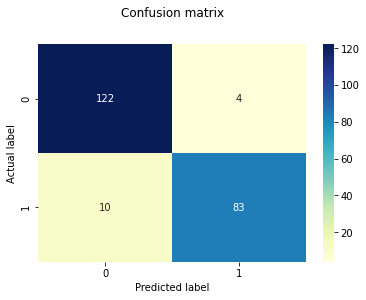

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       126
           1       0.95      0.89      0.92        93

    accuracy                           0.94       219
   macro avg       0.94      0.93      0.93       219
weighted avg       0.94      0.94      0.94       219



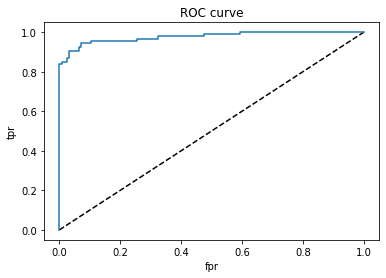

(0.1943994164466858, 0.9656357169151306)

In [48]:
training_neural_network_3(120,0.01,0.01)